**Module 1 Work Continued**


**Step One** *Obtain* 

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

Goal is to utilize the independent variables given to build a linear model to predict housing prices in Kings County.

**Step Two** *Scrub* 

In order to scrub the data, we'll first need to import it and understand exactly what it is we have to work with.

In [456]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [457]:
kings_df = pd.read_csv('kc_house_data.csv')

In [458]:
kings_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Right away we can see that there are 21 columns we'll need to evaluate.

ID will most likely be removed and irrelevant moving forward.  In addition, we most likely do not need date.  Further, We can already see in only the first few lines that there are NaNs that we'll need to look through further.

In [459]:
kings_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From here we can see a few things that we'll want to invesitage right away
1. What does each column mean?
2. Are there NaNs located in the data?
3. Is there data encoded to the wrong data type?
4. Do we need to subsample or is the data limited enough that it becomes unnecessary?

**We'll go ahead and take a look at each column definition first so that we can better understand what we're looking at.  To do this, we'll go to the Kaggle database for this information.**

* **id** - Identifier for each house
* **date** - Date each house was sold
* **price**- This our dependent variable and what we'll be predicting
* **bedrooms** - Number of bedrooms 
* **bathrooms**- Number of bathrooms 
* **sqft_living** - Square footage 
* **sqft_lot**- Square footage of the lot (or the land the house is on)
* **floors** - Total floors in house
* **waterfront** - This indicates a house that has a view of the water
* **view** - This indiciates whether or not the house has been viewed
* **condition** - How good the overall condition of the house is in
* **grade** - This seems to be a grade that is assigned based on the county's grading system.
* **sqft_above** - Square footage of house, not including the basement level
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year the house was built
* **yr_renovated**- Most recent year the house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - Living room area in 2015 - this would mean that the house has since been renovated
* **sqft_lot15** -  Lot size area in 2015 - again, this would mean that the lot has since been renovated (probably a direct corelation to the sqft_living15, but we'll need to do more investigating before we can confirm)

**Now we'll check for improperly encoded data types followed by NaNs.  The way to start this process is to to use .info() to understand the data types per column**

In [460]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Observations that we can make from here:
Date is an object - we'll want to change this to a date data type.
Sqft basement is currently a string instead of an int so we'll have to change that as well.
Grade and condition both seem to be categorical.  We'll have to look into these further.


To understand condition further since the .head() doesn't show everything I want to see, I'm going to take a look at the values in **condition** in order to see if they seem to be categorical.

In [461]:
kings_df['condition'].unique()

array([3, 5, 4, 1, 2])

It definitely seems based on the unique values above that condition is a categorical column that rates the condition of the home somewhere between 1 and 5. Now let's do the same for **grade** just to be sure.

In [462]:
kings_df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

While there are definitely more options in grade, it does seem that these are categorical.

**Next, we'll want to change this categorical columns to categories instead of integers.**  

In [463]:
kings_df['condition'] = kings_df['condition'].astype('category')
kings_df['grade'] = kings_df['grade'].astype('category')

Now let's move on to the continuous data.

First, **Change sqft_basement to a number**

In [464]:
 kings_df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
243.0         1
704.0         1
3260.0        1
3480.0        1
2400.0        1
2240.0        1
768.0         1
1008.0        1
248.0         1
4130.0        1
1248.0        1
1960.0        1
1245.0        1
374.0         1
2580.0        1
4820.0        1
3500.0        1
1913.0        1
2050.0        1
935.0         1
1481.0        1
2610.0        1
602.0         1
475.0         1
2390.0        1
1525.0        1
1920.0        1
274.0         1
2360.0        1
2850.0        1
Name: sqft_basement, Len

In looking at the values, we can see that there is a "?" value.  This will stop us from converting the data type so we'll need to handle this first. 

From this we can see that a majority of our homes do not have a basement. In fact, out of 21597 entries, 12826 do not have a basement, making this more than 50% of the houses that we are evaluating.  Based on this common data, it would be a safe assumption that the "?" more likely do not have basements, than do.  While we could delete them, it would make greater sense to change the "?"s to 0's.

In [465]:
kings_df['sqft_basement'] = kings_df['sqft_basement'].map(lambda x: '0' if x == '?' else x)

In [466]:
kings_df['sqft_basement'] = kings_df['sqft_basement'].astype('float')

Now let's look at all the changes we've made.

In [467]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(2), float64(9), int64(9), object(1)
memory usage: 3

Great! Now let's look for **NaN** values by looking at the sum of na values per column:

In [468]:
kings_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Let's start with **waterfront**. Let's visualize this column's data.

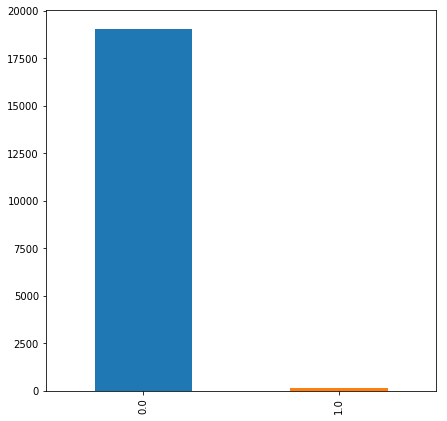

In [469]:
kings_df['waterfront'].value_counts().plot(kind='bar', figsize =[7,7])

It's obvious based on this that almost all of the houses do not have a view of the water.  For this reason, 0.00 is our median.  It makes the most sense to fill our NAs in this case with 0.

In [470]:
kings_df.waterfront.fillna(kings_df.waterfront.median(), inplace = True)

Next, let's look at whether or not the house has been **viewed**. 

Text(0, 0.5, 'View Counts')

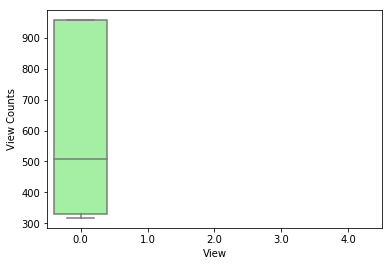

In [471]:
import seaborn as sns
sns.boxplot(x=kings_df['view'], y = kings_df['view'].value_counts(),showfliers=False, color='palegreen')
plt.xlabel('View')
plt.ylabel('View Counts')

In [472]:
counts = kings_df['view'].value_counts().to_dict()
print(counts)

{0.0: 19422, 2.0: 957, 3.0: 508, 1.0: 330, 4.0: 317}


As we can see again, a majority of the houses have not yet been viewed.  Thus, it makes sense to fill our NAs again with the median, or 0.

In [473]:
kings_df.view.fillna(kings_df.view.median(), inplace = True)

Finally, let's take a look at **year renovated** and visualize it as well as check value counts.

Text(0, 0.5, 'Year Renovated Counts')

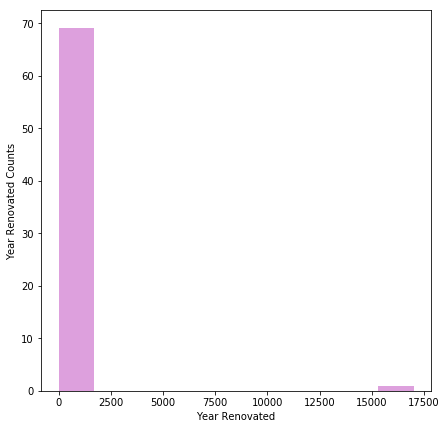

In [474]:
kings_df['yr_renovated'].value_counts().plot(kind='hist', figsize =[7,7], color = 'plum')
plt.xlabel('Year Renovated')
plt.ylabel('Year Renovated Counts')

Again, it seems like a majority of our houses have not been renovated, but let's also take a look at the value counts just to be sure.

In [475]:
counts2 = kings_df['yr_renovated'].value_counts()
print(counts2)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

There are so many more 0's than there are any other value that it makes sense to again, fill our NAs with 0's.  Should there have been a more diverse set of values that showed more prominence, we would have binned them, but in this case, updating to the median makes the most sense.

In [476]:
kings_df.yr_renovated.fillna(kings_df.yr_renovated.median(), inplace = True)

Now, let's make sure there are no lingering NAs that we might have missed.

In [477]:
kings_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Great! Now our data seems clean!** Before we move forward, let's go ahead and drop the date and id columns.  It seems that there are much greater predictors usable here to determine house price than sold date and id is a unique identifier that will not help us to predict price.

In [478]:
kings_df.drop(['date'], axis=1, inplace = True)
kings_df.drop(['id'], axis=1, inplace = True)

In [479]:
kings_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now we can move to our next step in the OSEMiN Method.

**Step Three** *Explore Data*

Before we can go through the data and make predictions, we need to make sure that we thoroughly understand what we're working with.

The best way to do this is to look at the dataframe as a whole as a vizualization.  In this case, a histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4177d748>,
      dtype=object)

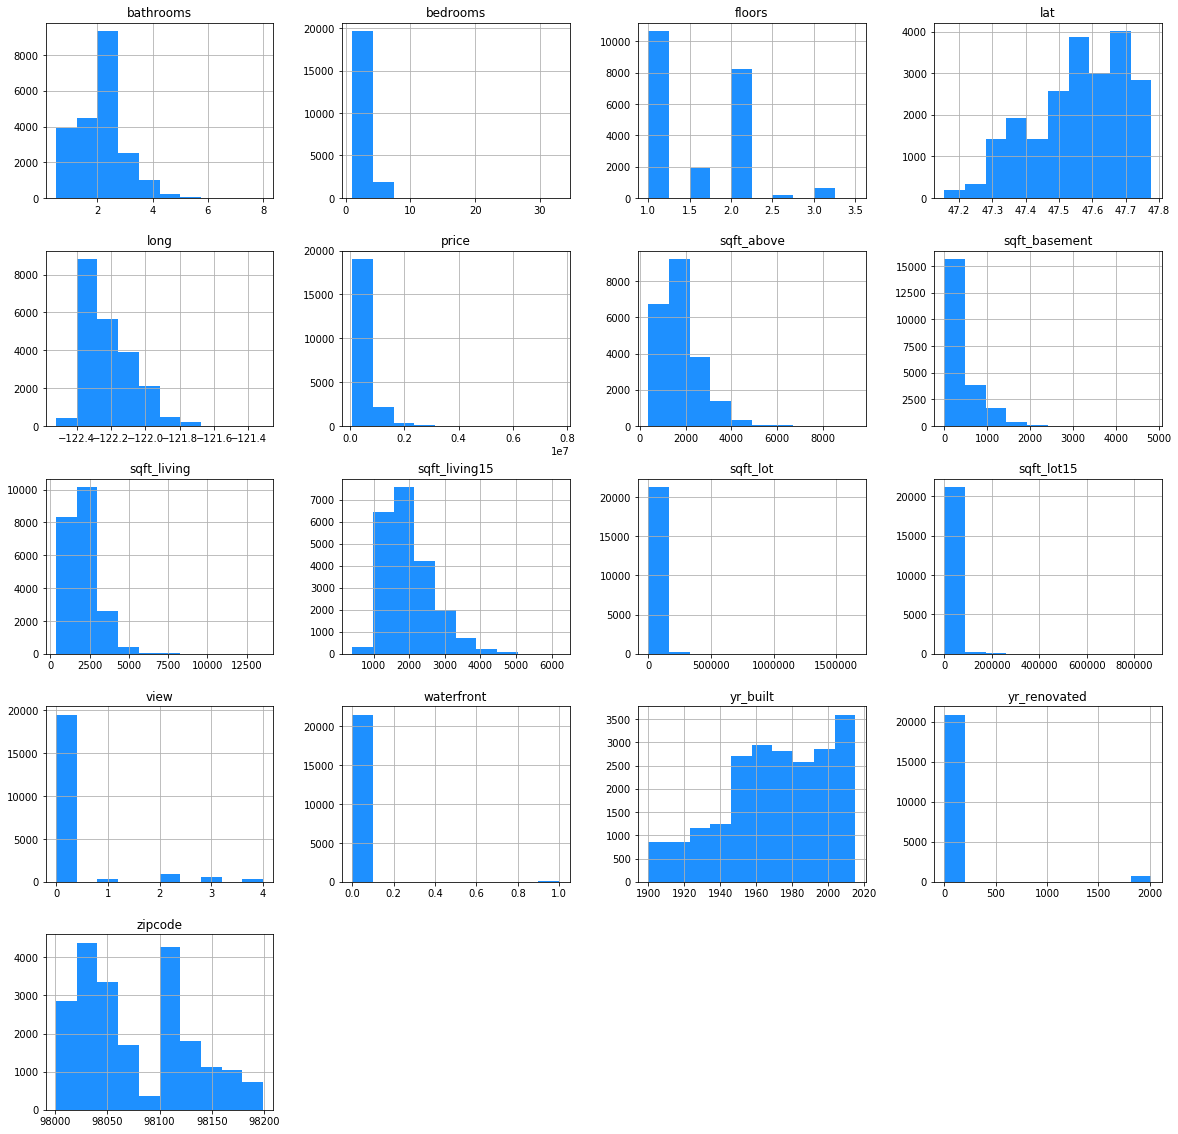

In [480]:
kings_df.hist(figsize=(20,20), color ='dodgerblue')

Immediately we can see that none of this data is normalized and we'll have some work to do to scale and normalize this data.

Before we do, let's check the correlation as we'll want to drop the columns that are highly correlated before we start adjusting the data.

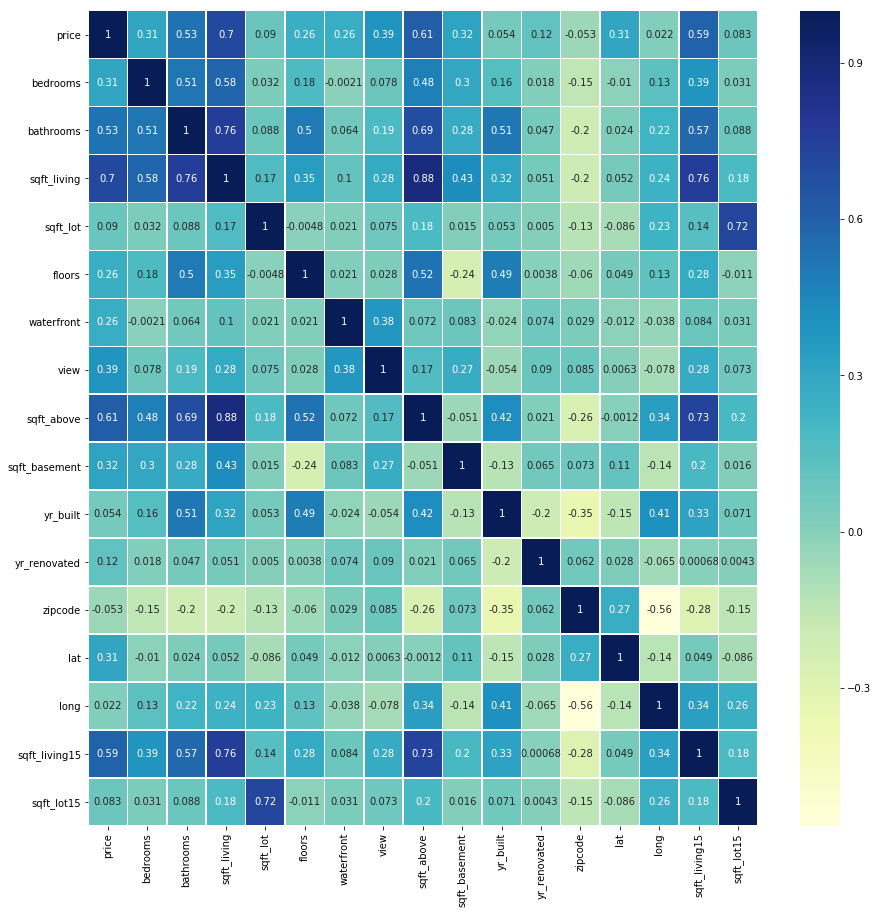

In [481]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(kings_df.corr(),annot=True,linewidth=0.5,cmap="YlGnBu")

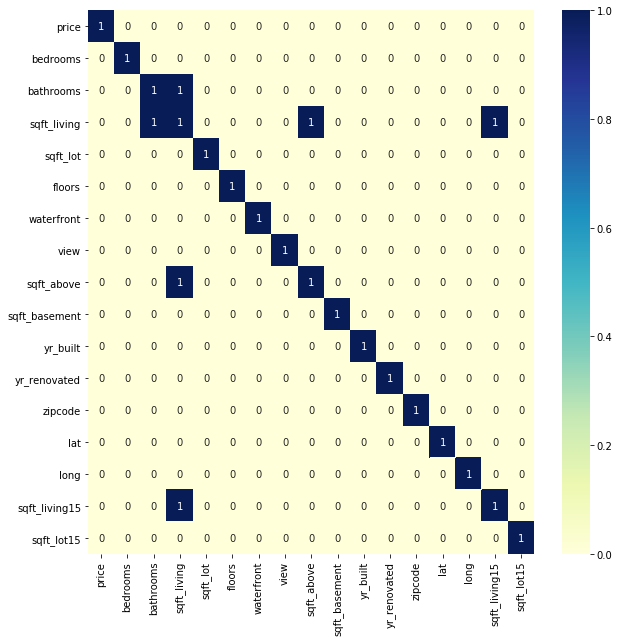

In [482]:
plt.figure(figsize=(10,10))
sns.heatmap(kings_df.corr() > .75,annot=True, cmap="YlGnBu")

*Based on the observations above, we can see that:*

* bathrooms and sqft_living are highly correlated
* sqft_living and sqft_above are highly correlated
* sqft_living and living15 are highly correlated

I'll be dropping all but living15 and bathrooms to start, since we can use that one to get an idea of the square foot of living now.  If the house wasn't renovated then the number will be the same under sqft_living and sqft_living15. I think understanding how square foot of living will affect pricing will be useful in our evaluations.

Additionally, we'll keep bathrooms for now as the number of bathrooms might have an affect as well.

Let's drop these columns

In [483]:
kings_df.drop(['sqft_living', 'sqft_above' ], axis=1, inplace = True)
kings_df.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,101930,1.0,0.0,0.0,3,11,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,6819,2.0,0.0,0.0,3,7,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,9711,1.0,0.0,0.0,3,7,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,7470,1.0,0.0,0.0,3,7,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,6560,2.0,0.0,0.0,3,7,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Now, I'd like to look at the correlation again to see if that got rid of all the things that were highly correlated.

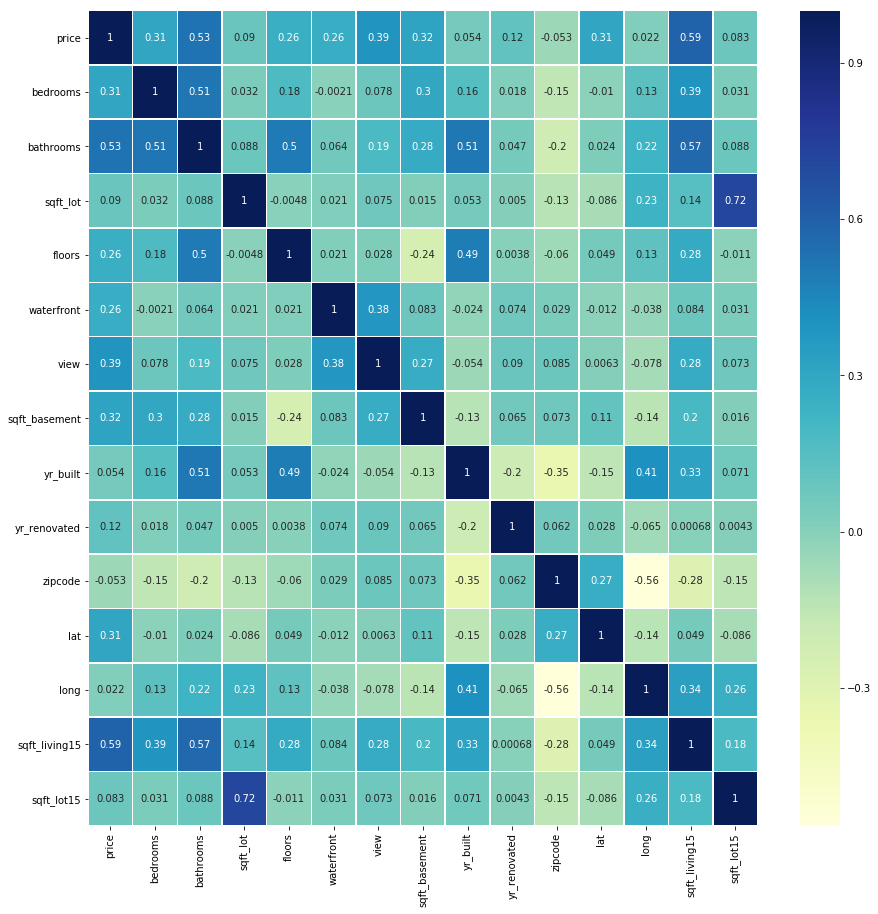

In [484]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(kings_df.corr(),annot=True,linewidth=0.5,cmap="YlGnBu")

It looks like squarefoot of the lot and squarefoot of living 15 seem to be highly correlated at .72 as well.  Let's remove sqft_lot because we stil have sqft_lot 15 to look at the most up to date data.

In [485]:
kings_df.drop(['sqft_lot'], axis=1, inplace = True)
kings_df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,1.0,0.0,0.0,3,11,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,2.0,0.0,0.0,3,7,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1.0,0.0,0.0,3,7,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1.0,0.0,0.0,3,7,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,2.0,0.0,0.0,3,7,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


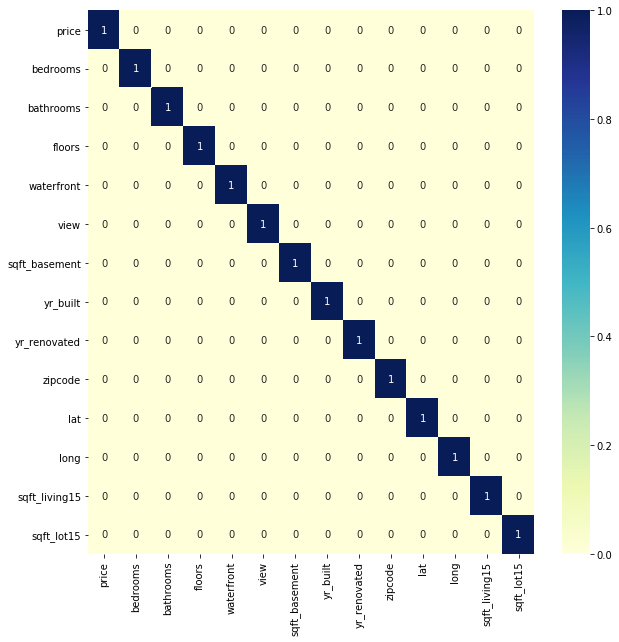

In [486]:
plt.figure(figsize=(10,10))
sns.heatmap(kings_df.corr() > .70,annot=True, cmap="YlGnBu")

Much better. Now, let's start by working through each column to get a better idea of what we're working with and how we should be adjusting accordingly.

First up, **bedrooms**

In [487]:
 kings_df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Immediately we can see that there's a house with 33 bedrooms, which seems like bad data to me.  Let's drop the rows where bedroom has 33.

In [488]:
kings_df.drop(kings_df.index[kings_df['bedrooms'] == 33], inplace=True)

Let's make sure that worked.

In [489]:
 kings_df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Great! Now let's take a look at a histogram to see what else we can see with bedrooms.

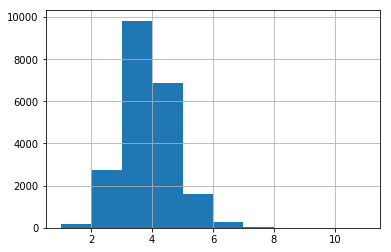

In [490]:
kings_df.bedrooms.hist()

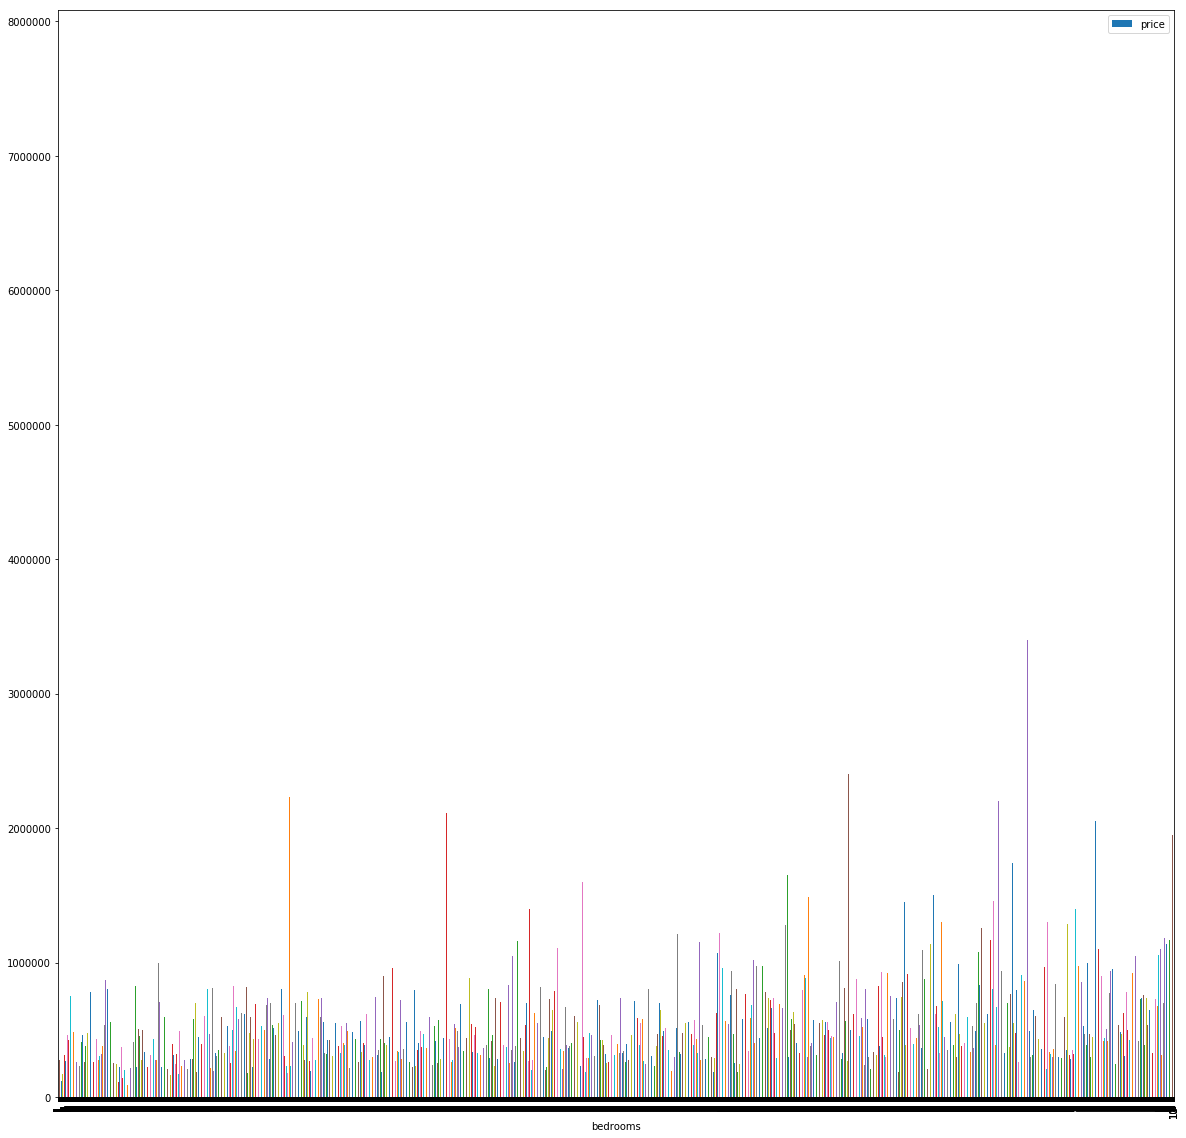

In [491]:
kings_df = kings_df.sort_values('bedrooms')
kings_df.plot(kind = 'bar', x ='bedrooms', y = 'price', figsize = [20,20])
plt.show()

This already looks much better and more normalized. It seems that most houses in the area are somewhere between two and five bedrooms and this could potentially drive the price. Let's move on to **bathrooms**. I anticipate that this, along with bedrooms will have a similar impact on price. 

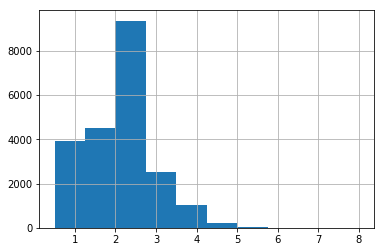

In [492]:
kings_df.bathrooms.hist()

In [493]:
kings_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

It's clear that the most common houses have somewhere between 1 and 3 bathrooms.  I'd like to explore this further to see the way both bedroom and bathroom values affect price.

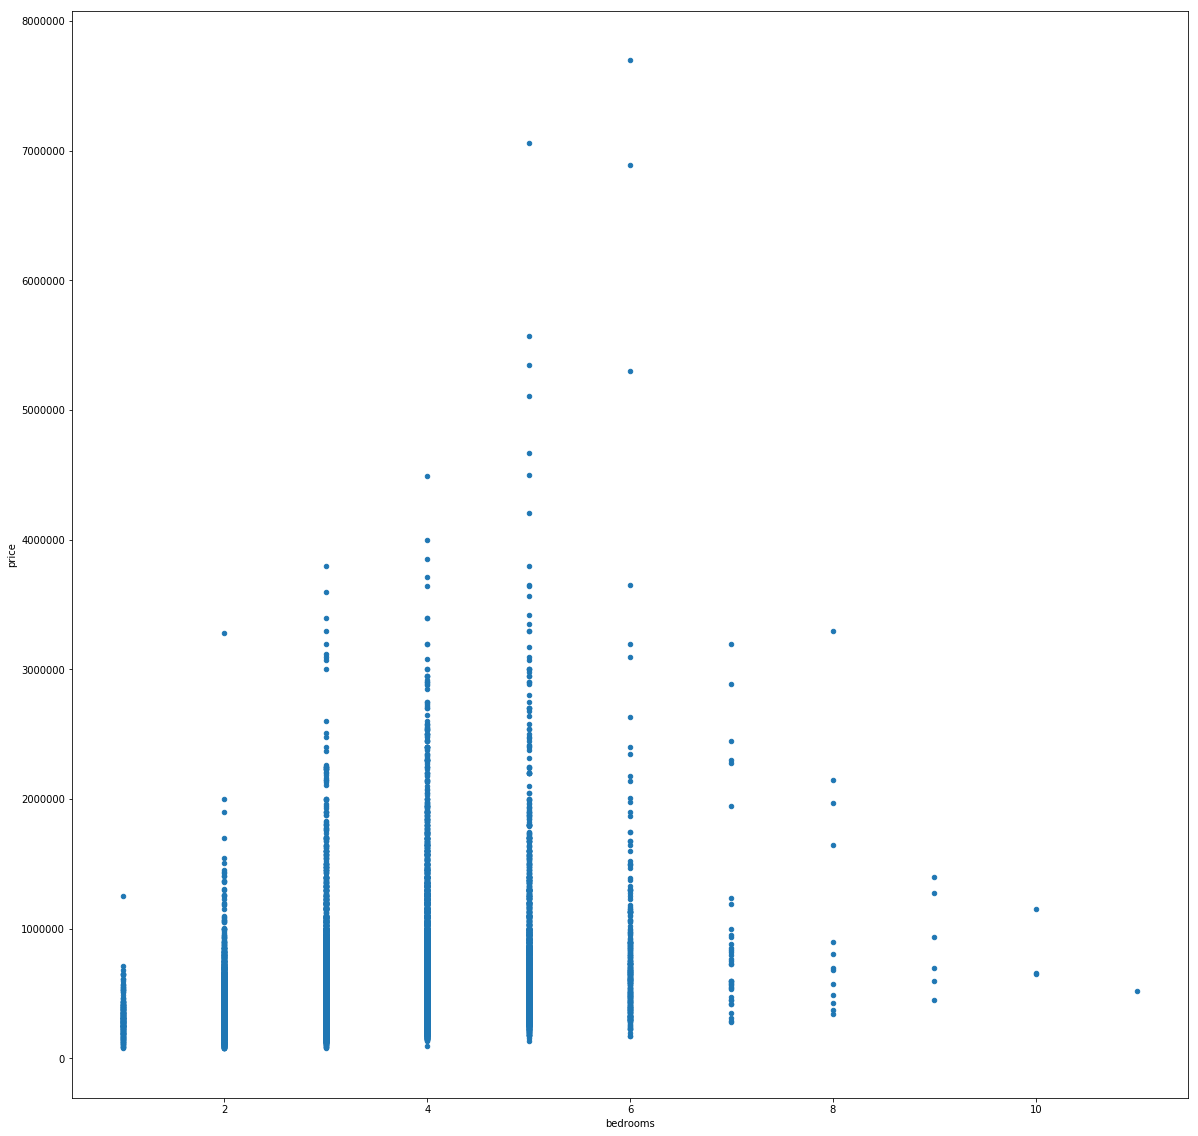

In [494]:
kings_df = kings_df.sort_values('bedrooms')
kings_df.plot(kind = 'scatter', x ='bedrooms', y = 'price', figsize = [20,20])
plt.show()

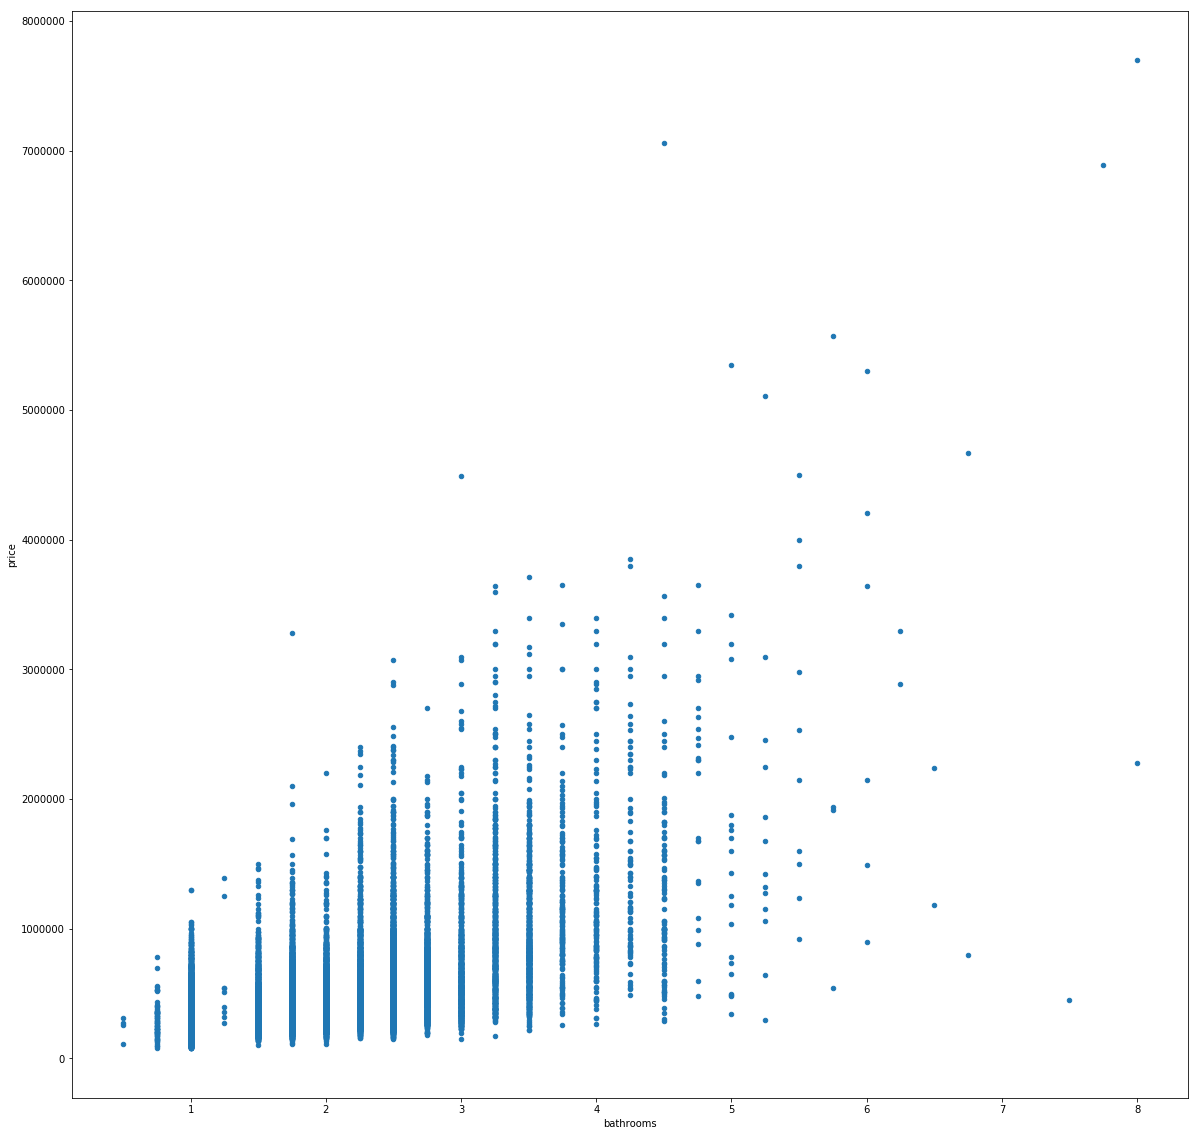

In [274]:
kings_df = kings_df.sort_values('bathrooms')
kings_df.plot(kind = 'scatter', x ='bathrooms', y = 'price', figsize = [20,20])
plt.show()

In each instance we can see that there are some serious outliers, but that these outliers drive price. You can also see that as bathrooms increase, price does go up slightly, but as bedrooms increase, this is not always the case.  There are more likely other variables that will affect price greater.

Great! Now let's move on to **floors**.  I think these could be categorical but let's take a look at the data.

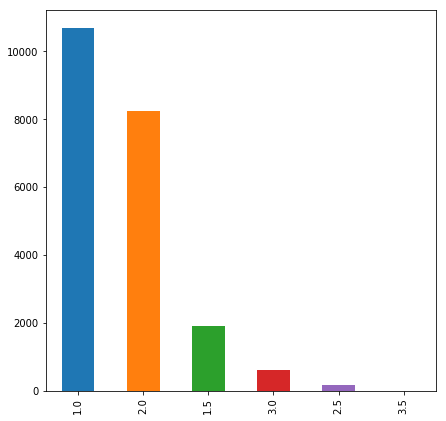

In [495]:
kings_df['floors'].value_counts().plot(kind='bar', figsize =[7,7])

It's clear that most of these houses have between one and two floors, but I'd be curious to see the value counts associated with 2.5 and 3 floors in particular.

In [496]:
(kings_df['floors'] == 2.5).value_counts()

False    21435
True       161
Name: floors, dtype: int64

In [497]:
(kings_df['floors'] == 3.0).value_counts()

False    20985
True       611
Name: floors, dtype: int64

In [498]:
(kings_df['floors'] > 3.0).value_counts()

False    21589
True         7
Name: floors, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a485cfef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4b192898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a485cfda0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4b192f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a409272b0>],
 'means': []}

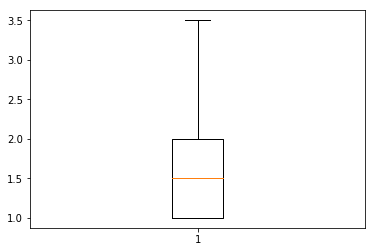

In [499]:
plt.boxplot(kings_df['floors'])

again, anything greater than two is clearly an outlier here, but ill probably start by removing 3.5 and see how this affects our data.

In [500]:
kings_df.drop(kings_df.index[kings_df['floors'] >3 ], inplace=True)

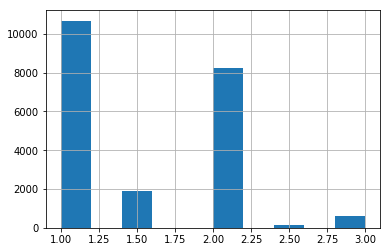

In [501]:
kings_df.floors.hist()

Next, let's take a look at **yr_built**

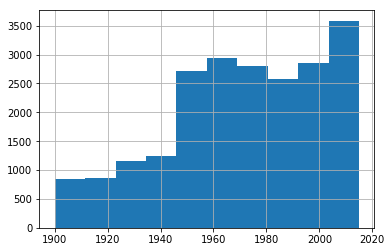

In [502]:
kings_df['yr_built'].hist()

Let's check out the relationship between year built and price.

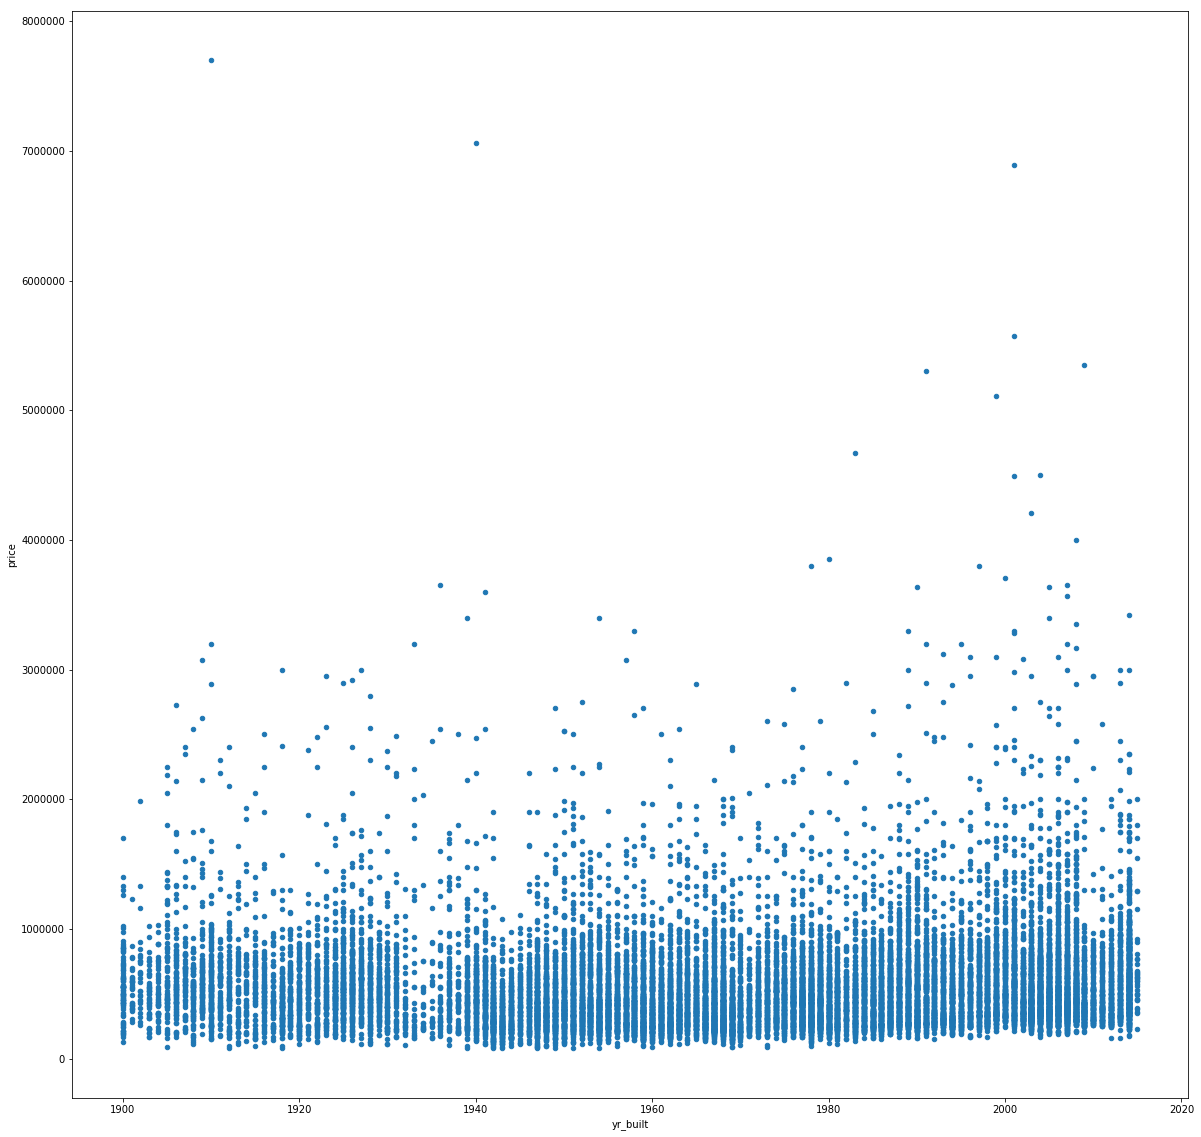

In [503]:
kings_df = kings_df.sort_values('yr_built')
kings_df.plot(kind = 'scatter', x ='yr_built', y = 'price', figsize = [20,20])
plt.show()

What would happen if we tried to normalize this data?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e5309e8>]],
      dtype=object)

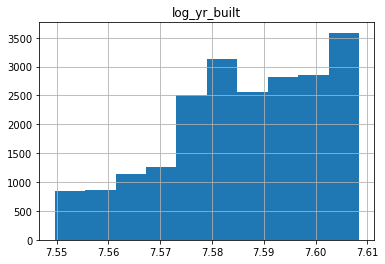

In [504]:
kings_log = pd.DataFrame([])
kings_log["log_yr_built"] = np.log(kings_df["yr_built"])
kings_log.hist()

As we can see this didn't do much but reiterates that as year increases, price increases as well.

The next set of data that I'm interested in has to do with location.  We have three columns that relate to location which will be a huge selling point for both sellers/buyers.  We can look at, latitude, longitude and zipcode. I don't think that we need all three in order to figure this out and so what I'd like to do is work with latitude and longitude.  I feel that we can get much more detailed data from this eg. how prices change as we move north or west, etc

In [505]:
kings_df.drop(['zipcode'], axis=1, inplace = True)

In [506]:
kings_df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
1440,352950.0,3,1.0,1.5,0.0,0.0,1,6,0.0,1900,0.0,47.6598,-122.348,1320,1266
703,485000.0,4,2.0,1.0,0.0,0.0,3,7,300.0,1900,0.0,47.6385,-122.370,1630,2048
10515,850000.0,3,2.0,2.0,0.0,0.0,3,8,0.0,1900,1988.0,47.6343,-122.283,2970,3600
9469,850000.0,3,3.0,1.5,0.0,0.0,3,9,0.0,1900,0.0,47.6572,-122.346,1280,1310
12021,1260000.0,4,2.0,2.5,0.0,0.0,4,9,0.0,1900,0.0,47.6235,-122.309,2500,5040


Now let's look at latitude and logitude

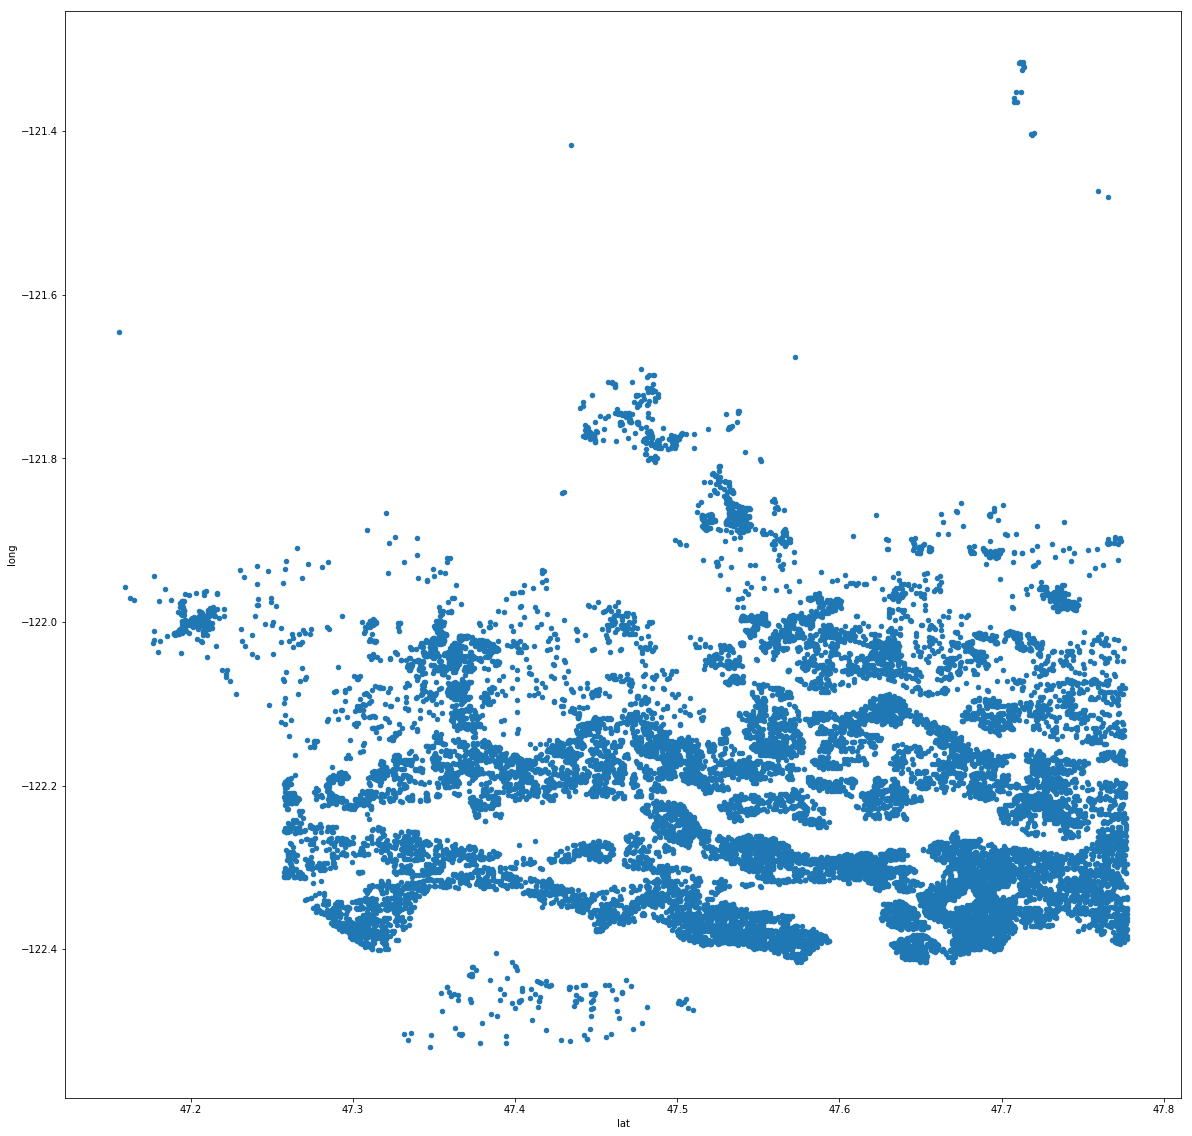

In [507]:
kings_df.plot(kind = 'scatter', x ='lat', y = 'long', figsize = [20,20])
plt.show()

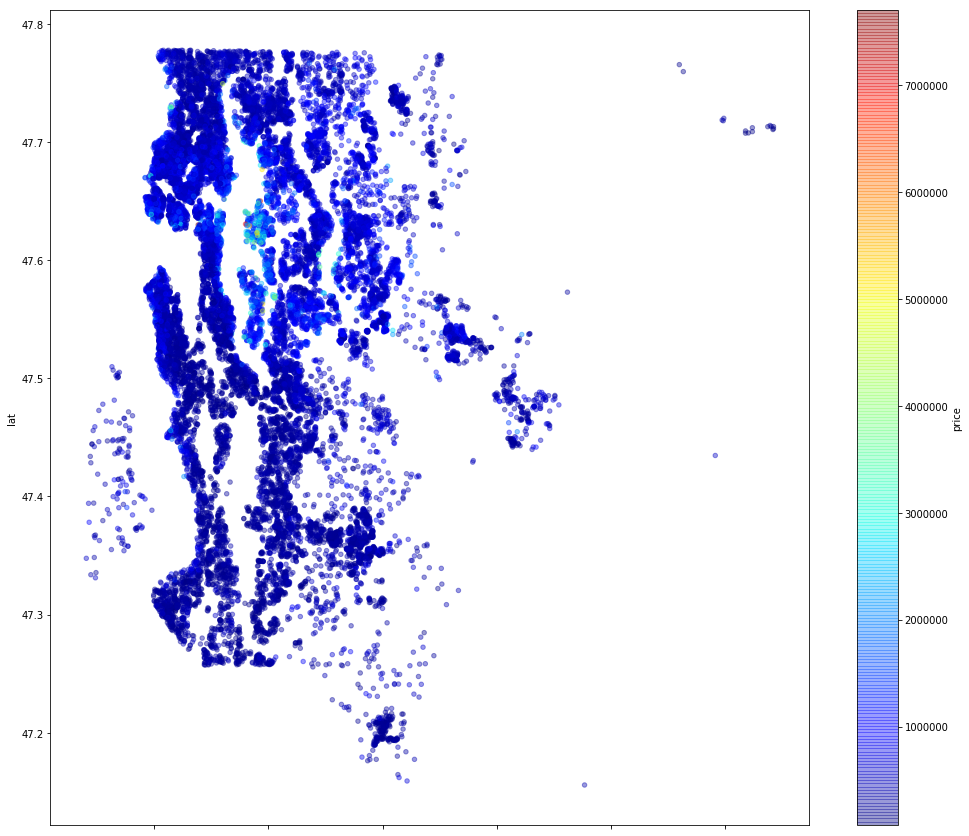

In [508]:
kings_df.plot(kind="scatter", x="long", y="lat",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(17,15),
)
plt.show()

We can use these coordinates to see which locations have the greatest prices

Next, I'd like to look at view and waterfront since I do believe that houses with views and houses with waterfronts will drive price significant.

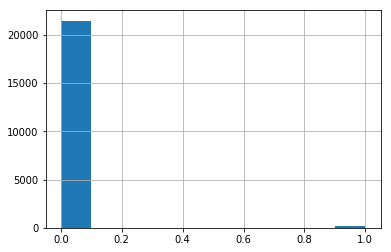

In [509]:
kings_df['waterfront'].hist()

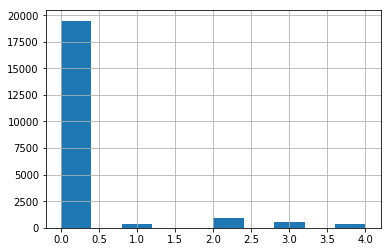

In [510]:
kings_df['view'].hist()

We can't really normalize either of these so we'll move forward and look how each relates to price individually.

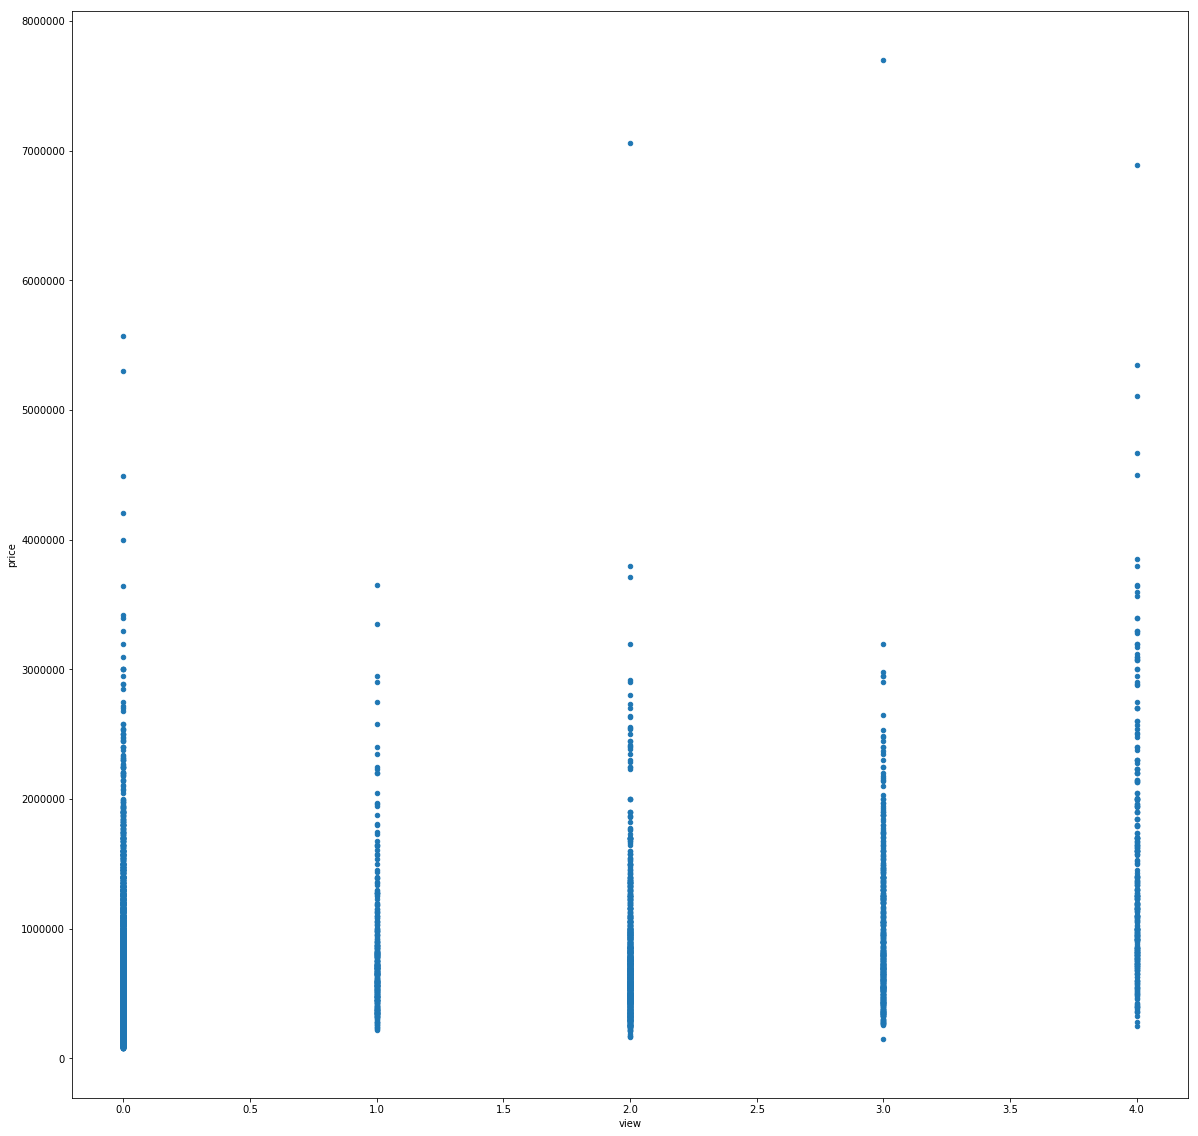

In [511]:
kings_df = kings_df.sort_values('view')
kings_df.plot(kind = 'scatter', x ='view', y = 'price', figsize = [20,20])
plt.show()

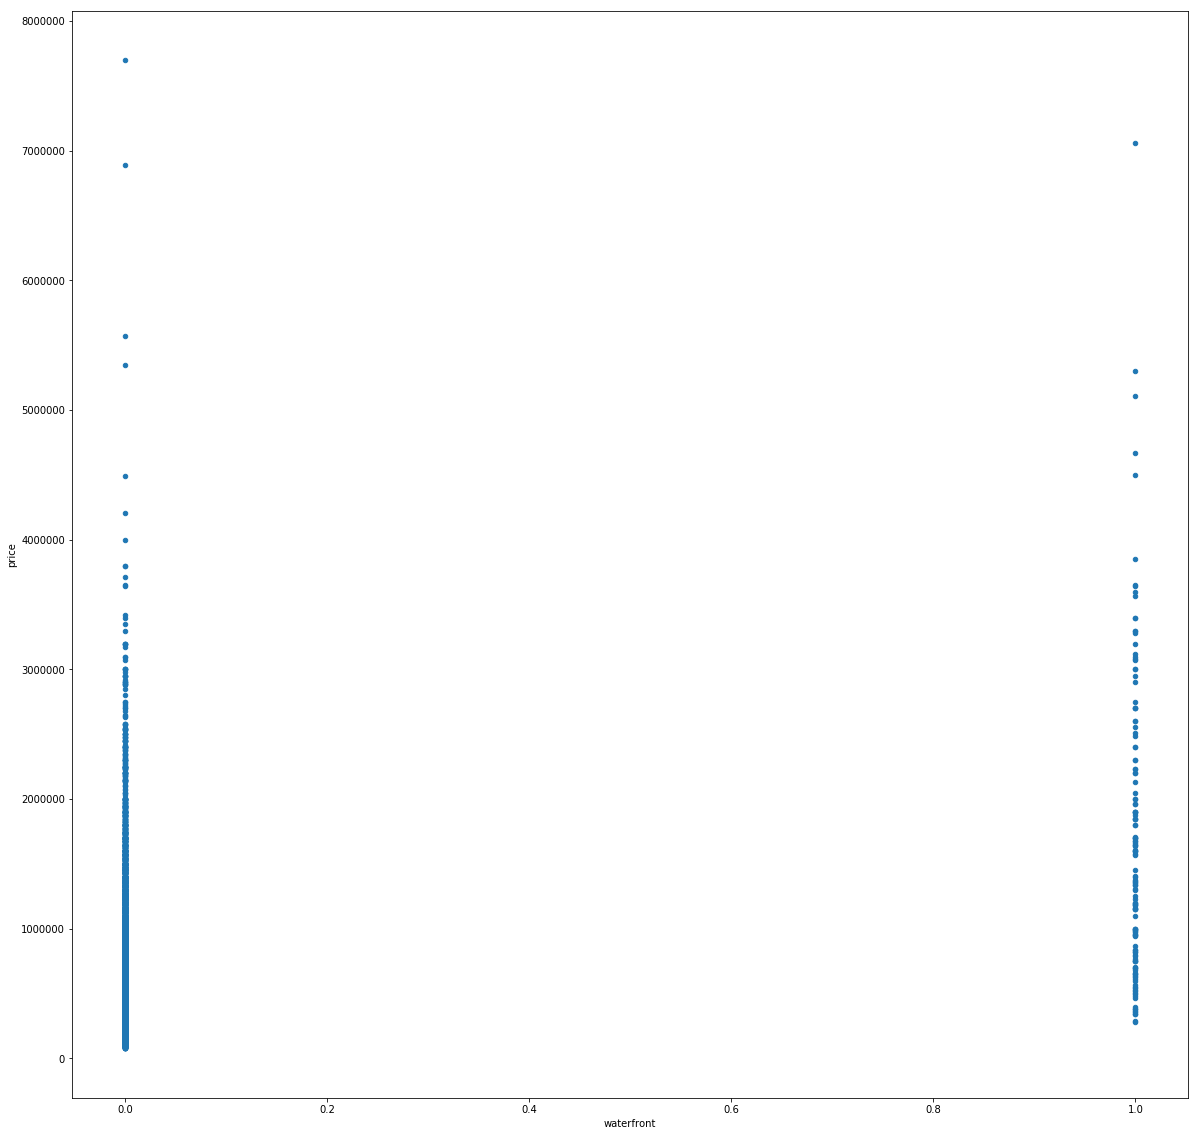

In [512]:
kings_df = kings_df.sort_values('waterfront')
kings_df.plot(kind = 'scatter', x ='waterfront', y = 'price', figsize = [20,20])
plt.show()

It's clear here that view seems to drive price, but that not in all cases does having a waterfront drive price. Waterfronts can come with their own issues such as flooding and so it's not crazy to think that people would not necessarily want a waterfront or be willing to pay extra for one.

Now let's take a look at the living and loft square footage from 2015.

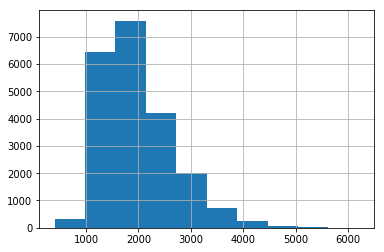

In [513]:
kings_df['sqft_living15'].hist()

Let's start by log transforming this one to make it a bit more normalized.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27031f28>]],
      dtype=object)

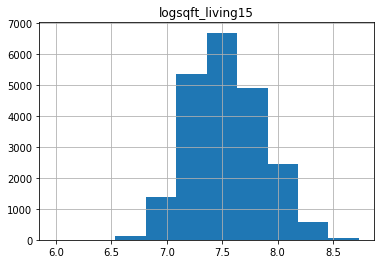

In [514]:
import numpy as np
kings_log = pd.DataFrame([])
kings_log["logsqft_living15"] = np.log(kings_df["sqft_living15"])
kings_log.hist()

That looks much better.  Let's also take a look at sqft_lot.  After we normalize that one (if necessary) we can go ahead and scale as well)

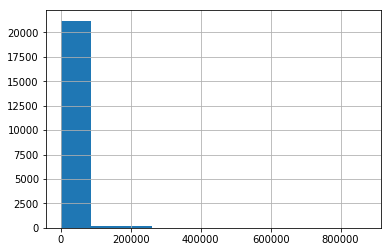

In [515]:
kings_df['sqft_lot15'].hist()

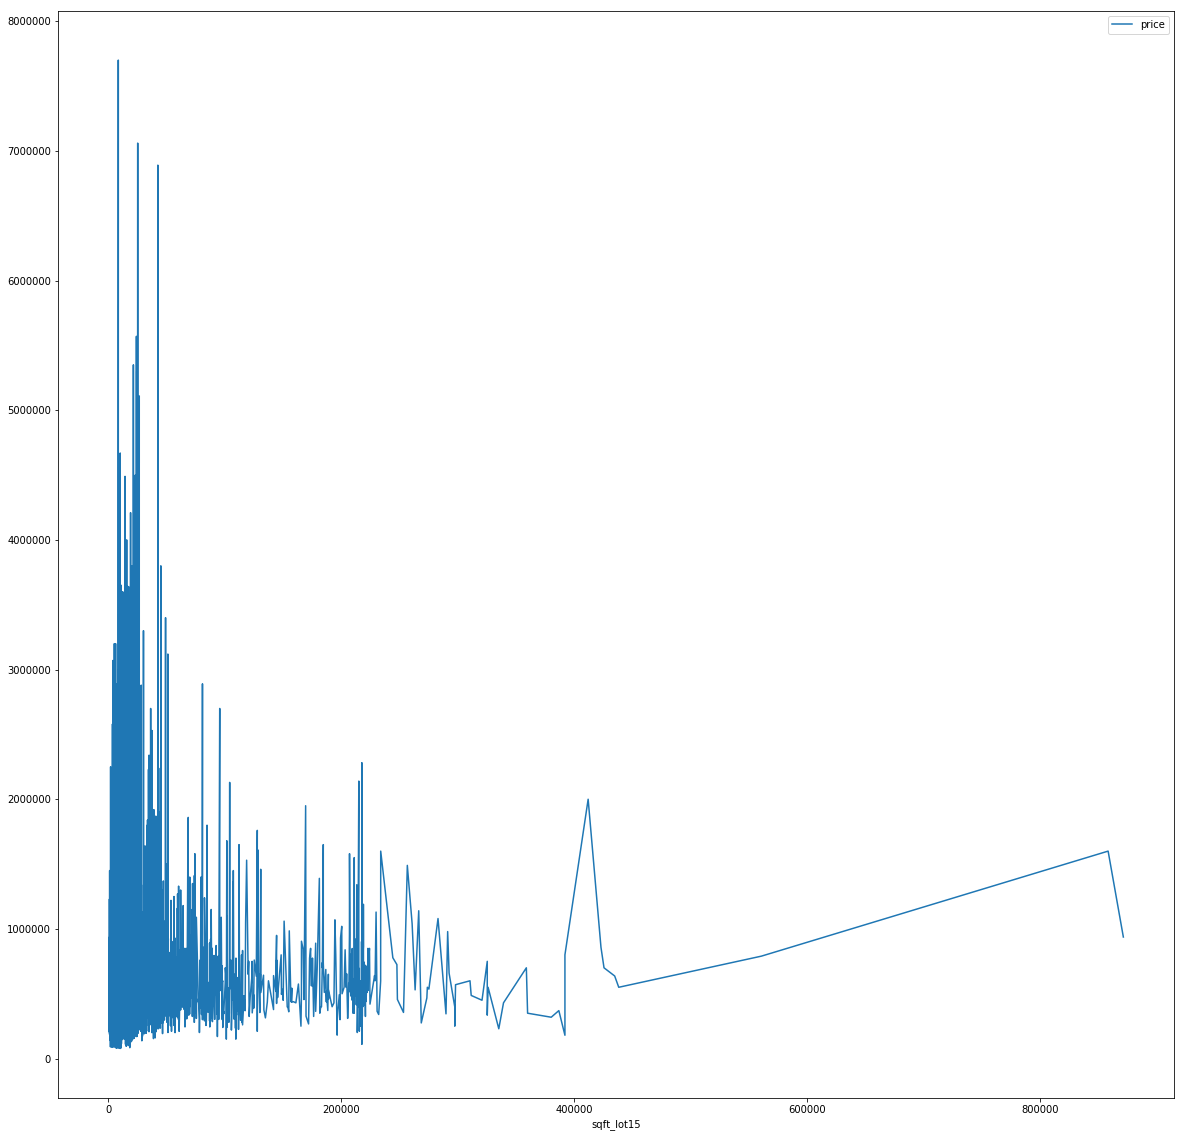

In [407]:
kings_df = kings_df.sort_values('sqft_lot15')
kings_df.plot(kind = 'line', x ='sqft_lot15', y = 'price', figsize = [20,20])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3f687f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3f67f908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3f687e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3f67ff98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3f67b320>],
 'means': []}

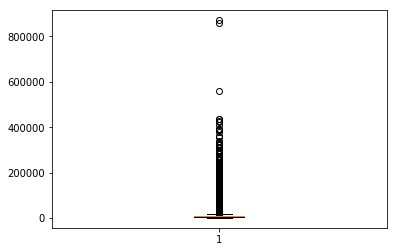

In [516]:
plt.boxplot(kings_df['sqft_lot15'])

We can see significant outliers over 800000

In [517]:
(kings_df['sqft_lot15'] > 800000).value_counts()

False    21587
True         2
Name: sqft_lot15, dtype: int64

Seems like we can get rid of these

In [518]:
kings_df.drop(kings_df.index[kings_df['sqft_lot15'] >800000 ], inplace=True)

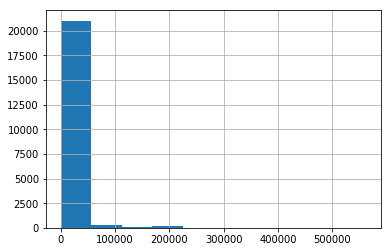

In [519]:
kings_df['sqft_lot15'].hist()

Still not normal but better.  Let's check one more thing

In [520]:
(kings_df['sqft_lot15'] > 500000).value_counts()

False    21586
True         1
Name: sqft_lot15, dtype: int64

In [521]:
kings_df.drop(kings_df.index[kings_df['sqft_lot15'] >500000 ], inplace=True)

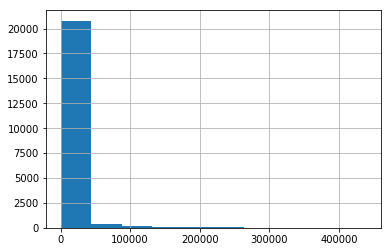

In [522]:
kings_df['sqft_lot15'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27031fd0>,
      dtype=object)

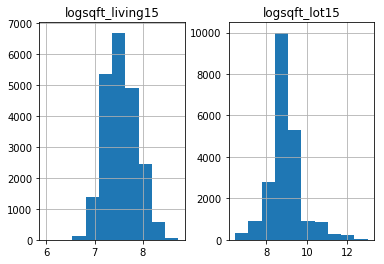

In [523]:
kings_log = pd.DataFrame([])
kings_log["logsqft_lot15"] = np.log(kings_df["sqft_lot15"])
kings_log["logsqft_living15"] = np.log(kings_df["sqft_living15"])
kings_log.hist()

That looks much better.  Now we can scale this along with sqft living

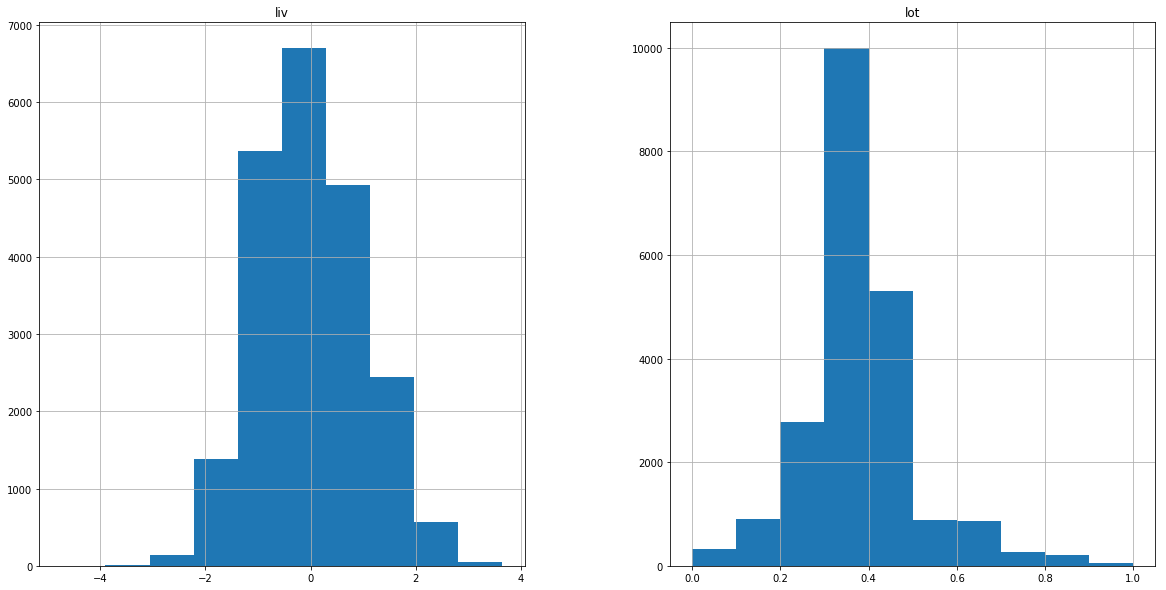

In [551]:
loglot = kings_log["logsqft_lot15"]
logliv = kings_log["logsqft_living15"]


scaled_lot = (loglot-min(loglot))/(max(loglot)-min(loglot))	
scaled_liv = (logliv-np.mean(logliv))/np.sqrt(np.var(logliv))

kings_df_cont_scaled = pd.DataFrame([])
kings_df_cont_scaled["lot"]= scaled_lot
kings_df_cont_scaled["liv"]= scaled_liv


kings_df_cont_scaled.hist(figsize  = [20, 10]);

Great - now these are scaled and normalized so that we can work with them along with the other data

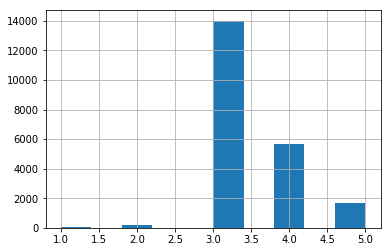

In [525]:
kings_df['condition'].hist()

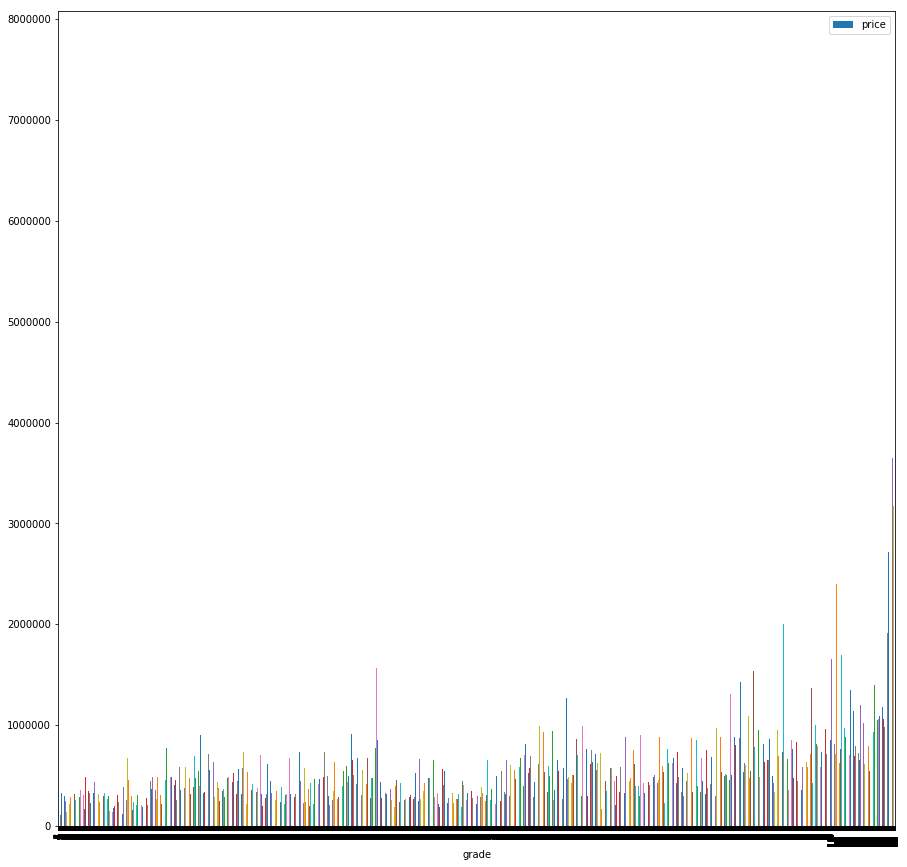

In [440]:
kings_df = kings_df.sort_values('grade')
kings_df.plot(kind = 'bar', x ='grade', y = 'price', figsize = [15,15])
plt.show()

In [526]:
grade_dummies = pd.get_dummies(kings_df["grade"], prefix="gr")

In [527]:
grade_dummies

,gr_3,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,gr_10,gr_11,gr_12,gr_13
1440,0,0,0,1,0,0,0,0,0,0,0
19284,0,0,0,1,0,0,0,0,0,0,0
9765,0,0,0,0,0,1,0,0,0,0,0
1612,0,0,0,1,0,0,0,0,0,0,0
1844,0,0,0,0,1,0,0,0,0,0,0
5409,0,0,0,1,0,0,0,0,0,0,0
12194,0,0,0,0,1,0,0,0,0,0,0
1603,0,0,0,1,0,0,0,0,0,0,0
17180,0,0,0,1,0,0,0,0,0,0,0
3678,0,0,0,0,1,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a41388240>,
      dtype=object)

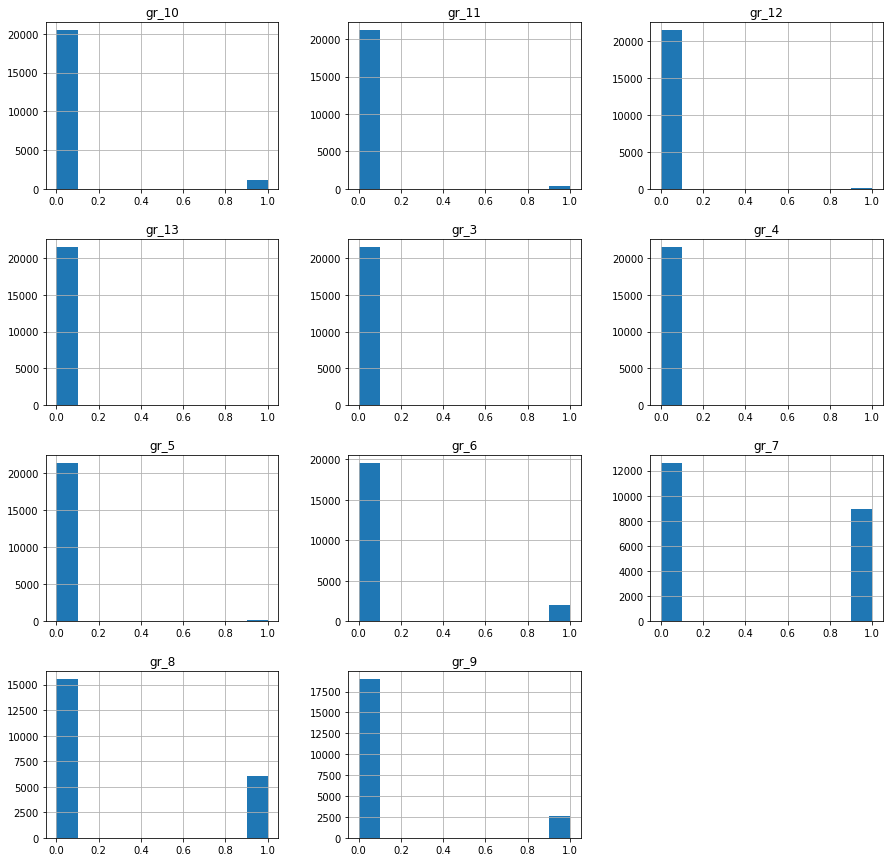

In [528]:
grade_dummies.hist(figsize = [15,15])

In [529]:
condition_dummies = pd.get_dummies(kings_df["condition"], prefix="con")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c1b5630>,
      dtype=object)

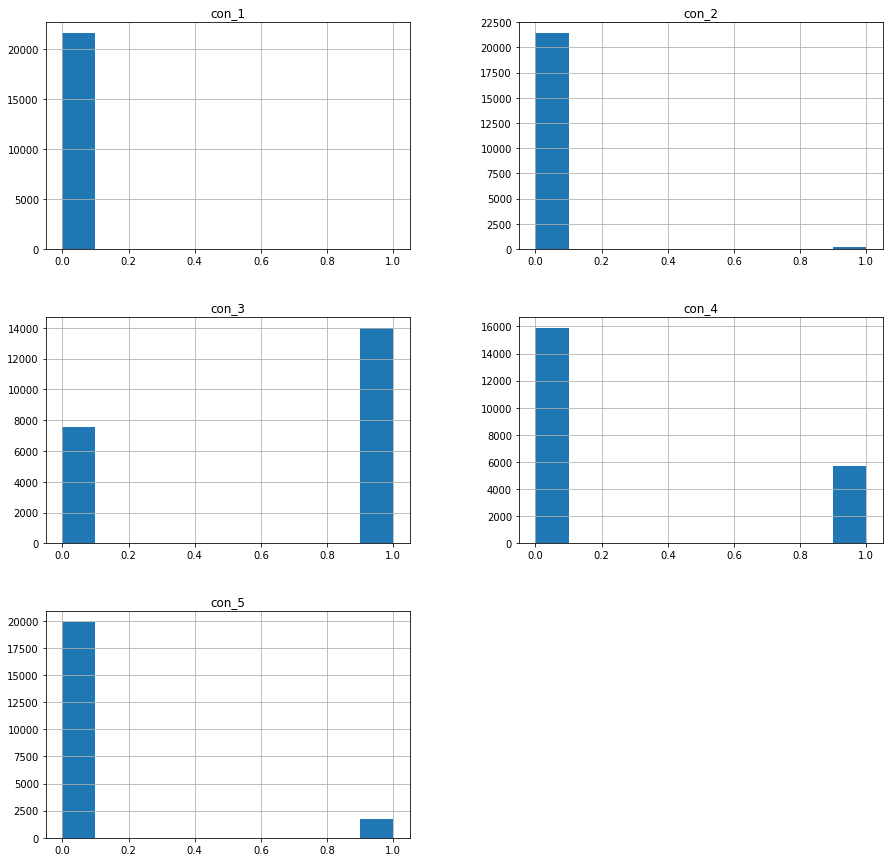

In [530]:
condition_dummies.hist(figsize = [15,15])

I think that we have enough factors that we're able to model now.

In [552]:
features_final= pd.DataFrame([])
features_final["logsqft_lot15"] = scaled_lot
features_final['living'] = scaled_liv

In [553]:
features_final

,logsqft_lot15,living
1440,0.102137,-1.081721
19284,0.337964,-2.054365
9765,0.262622,0.062695
1612,0.313068,-0.513314
1844,0.319091,-0.168550
5409,0.370021,-0.610903
12194,0.287749,-0.773836
1603,0.313068,-0.968166
17180,0.478673,-1.081721
3678,0.198425,-0.571492


In [550]:
kings_df_final = pd.concat([kings_df, kings_df_cont_scaled], axis=1, join='inner')
kings_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21586 entries, 1440 to 14808
Data columns (total 17 columns):
price            21586 non-null float64
bedrooms         21586 non-null int64
bathrooms        21586 non-null float64
floors           21586 non-null float64
waterfront       21586 non-null float64
view             21586 non-null float64
condition        21586 non-null category
grade            21586 non-null category
sqft_basement    21586 non-null float64
yr_built         21586 non-null int64
yr_renovated     21586 non-null float64
lat              21586 non-null float64
long             21586 non-null float64
sqft_living15    21586 non-null int64
sqft_lot15       21586 non-null int64
lot              21586 non-null float64
liv              21586 non-null float64
dtypes: category(2), float64(11), int64(4)
memory usage: 2.7 MB


In [559]:
kingds_df_final = pd.concat([kings_df_final.drop('condition', axis=1), pd.get_dummies(kings_df_final['condition'])], axis=1)

In [560]:
kings_df_final

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lot,liv
1440,352950.0,3,1.00,1.5,0.0,0.0,1,6,0.0,1900,0.0,47.6598,-122.348,1320,1266,0.102137,-1.081721
19284,174900.0,3,1.00,1.5,0.0,0.0,2,6,0.0,1926,0.0,47.5279,-122.318,960,5880,0.337964,-2.054365
9765,1100000.0,3,2.75,1.5,0.0,0.0,5,8,890.0,1926,0.0,47.6332,-122.281,1920,3600,0.262622,0.062695
1612,425000.0,3,1.00,1.5,0.0,0.0,4,6,0.0,1926,0.0,47.5387,-122.265,1590,5000,0.313068,-0.513314
1844,805000.0,3,1.75,1.0,0.0,0.0,4,7,200.0,1926,0.0,47.6503,-122.338,1780,5200,0.319091,-0.168550
5409,290000.0,2,1.00,1.0,0.0,0.0,3,6,0.0,1926,0.0,47.7069,-122.299,1540,7245,0.370021,-0.610903
12194,540000.0,3,1.75,1.5,0.0,0.0,4,7,0.0,1926,0.0,47.5745,-122.311,1460,4240,0.287749,-0.773836
1603,512000.0,2,2.00,1.0,0.0,0.0,4,6,660.0,1926,0.0,47.6694,-122.298,1370,5000,0.313068,-0.968166
17180,187250.0,2,1.00,1.0,0.0,0.0,5,6,0.0,1926,0.0,47.4939,-122.318,1320,14700,0.478673,-1.081721
3678,430000.0,4,2.00,1.0,0.0,0.0,3,7,910.0,1926,0.0,47.6112,-122.303,1560,2370,0.198425,-0.571492


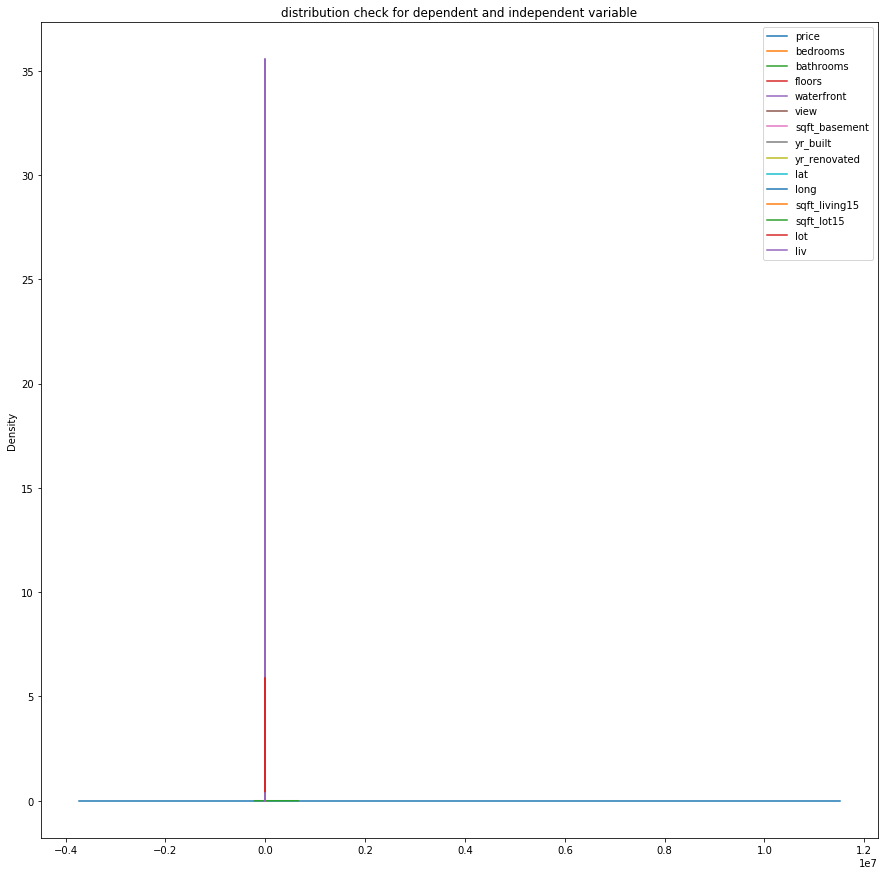

In [580]:
kings_df_final.plot.kde(figsize = [15,15])
plt.title("distribution check for dependent and independent variable")
plt.show()

In [563]:
from sklearn.model_selection import train_test_split
X = kings_df_final.drop('price', axis = 1)
y = kings_df_final[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [564]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16189 5397 16189 5397


In [566]:
#Apply Model to the Train Set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [567]:
#Fit the model to the train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [568]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [569]:
#Calculate predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [570]:
#Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [571]:
#Calculate the Mean Squared Error
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 44850449797.044655
Test Mean Squarred Error: 42190650064.81788


While these are relatively large, they are close which identifies that the test reflects the train well.

Additionally - the data is too large and different to have a small MSE

Let's evaluate the effect of the train-test split size

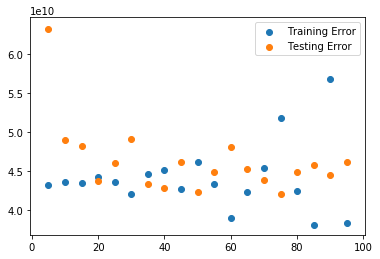

In [572]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

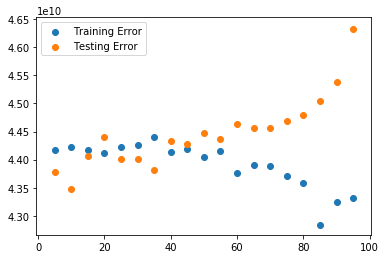

In [573]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [574]:
#K-Fold Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [575]:
cv_5_results

-63162483283.30467

In [576]:
cv_10_results

-48599543070.23175

In [577]:
cv_20_results

-48048959119.97881

In [581]:
# generating OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors_int = sm.add_constant(trainset_train)
model = sm.OLS(testset_train, predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2016.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:44:19   Log-Likelihood:            -2.2150e+05
No. Observations:               16189   AIC:                         4.430e+05
Df Residuals:                   16172   BIC:                         4.432e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.738e+07   1.97e+06    -13.914      0.000   -3.12e+07   -2.35e+07
bedrooms      -1668.3495   2322.220     -0.718      0.473   -6220.158    2883.459
bathrooms      1.011e+05   3772.494     26.803      0.000    9.37e+04    1.09e+05
floors         2.666e+04   4741.781      5.622      0.000    1.74e+04     3.6e+04
waterfront     5.912e+05   2.27e+04     26.080      0.000    5.47e+05    6.36e+05
view           5.158e+04   2538.740     20.316      0.000    4.66e+04    5.66e+04
condition      3.128e+04   2834.623     11.034      0.000    2.57e+04    3.68e+04
grade          1.348e+05   2441.412     55.233      0.000     1.3e+05     1.4e+05
sqft_basement    57.5634      4.847     11.876      0.000      48.062      67.064
yr_built      -2877.6740     85.911    -33.496      0.000   -3046.069   -2709.279
yr_renovated     26.8353      4.809      5.580      0.000      17.409      36.261
lat            5.261e+05   1.28e+04     41.043      0.000    5.01e+05    5.51e+05
long          -5.312e+04   1.48e+04     -3.589      0.000   -8.21e+04   -2.41e+04
sqft_living15   330.8778     12.017     27.534      0.000     307.323     354.432
sqft_lot15        0.1644      0.101      1.620      0.105      -0.035       0.363
lot           -7579.2868    2.5e+04     -0.303      0.762   -5.66e+04    4.14e+04
liv           -1.698e+05   7988.916    -21.260      0.000   -1.86e+05   -1.54e+05
==============================================================================
Omnibus:                    15652.282   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2341200.032
Skew:                           4.297   Prob(JB):                         0.00
Kurtosis:                      61.283   Cond. No.                     3.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared - all of the independent variables have a relatively small p-values, meaning that they are statistically significant except for log, sqft_lot15 and bedrooms, showing that these are statsitically insignificant in making predictions.  Lot and bedrooms appear to be statistically insignifigant in comparison to the rest of the independent variables.

R-Squard

The R-Square values is 0.67, which means the current model has an explanatory power of 67%.This means that the variables that we have worked with are able to predict price significantly with approximately 33% coming from different factors that might not be included in our dataset or errors in our current model.

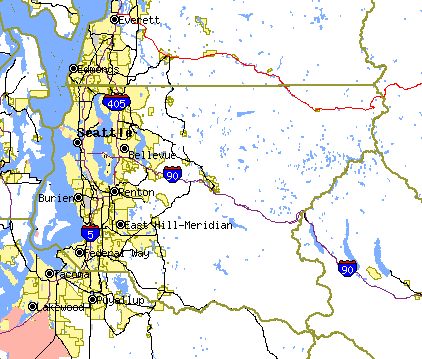